In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

from tkinter import *
from tkinter import messagebox

import matplotlib.pyplot as plt

import random

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_nums = len(class_names)

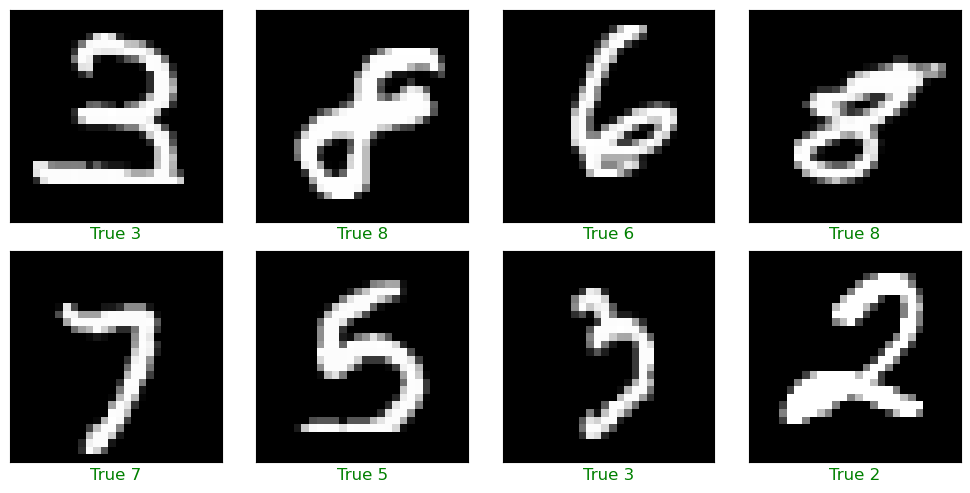

In [6]:
def plot_data(x_data:np.ndarray,y_data:np.ndarray) -> None:
    nrows,ncols = 2,4
    len_x = x_data.shape[0]
    fig, axes = plt.subplots(nrows, ncols, figsize = (10,5))
    for idx in range(ncols*nrows):
        ax = axes[idx // ncols,idx % ncols]
        img_idx = random.randint(0,len_x)
        
        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        
        true_label_str = f"True {class_names[y_data[img_idx]]}"
        ax.set_xlabel(true_label_str, color = 'green', fontsize = 12)
    plt.tight_layout()
    plt.show()
    
plot_data(x_train, y_train)

In [7]:
# Image Processing

In [8]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [9]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [10]:
y_train[0], y_train_label[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [11]:
# Neural Network 

In [12]:
input_shape = (28,28)

In [13]:
model = keras.models.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics='accuracy')

In [15]:
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train_label,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_split=0.2,
                   )

Epoch 1/10
375/375 [==============================] - 6s 12ms/step - loss: 0.2644 - accuracy: 0.9234 - val_loss: 0.1216 - val_accuracy: 0.9642
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0939 - accuracy: 0.9709 - val_loss: 0.1061 - val_accuracy: 0.9674
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0596 - accuracy: 0.9817 - val_loss: 0.0905 - val_accuracy: 0.9722
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0864 - val_accuracy: 0.9747
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0795 - val_accuracy: 0.9783
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0981 - val_accuracy: 0.9740
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0192 - accuracy: 0.9930 - val_loss: 0.1056 - val_accuracy: 0.9746
